In [2]:
#system handling
import os

#data frame handling
import numpy as np
import pandas as pd

#modeling handling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

#data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/covertype-forest-cover-types/covertype.csv


## Data Handling (using function)

## Displays:

# .head()

# .info()

# .describe()

# Average (mean of numeric features)

# Missing values count

# NaN values count

# Duplicate rows count

# Collects all results into a summary DataFrame

In [3]:
def explore_dataset(path):
    
    # Load dataset
    df = pd.read_csv(path)
    
    # Drop unknown / unnamed columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # Collect info
    head_data = df.head()
    describe_data = df.describe(include='all').transpose()
    info_buffer = []
    df.info(buf=info_buffer) if hasattr(info_buffer, 'write') else None
    
    # Summaries
    avg_values = df.mean(numeric_only=True)
    missing_values = df.isnull().sum()
    nan_values = df.isna().sum()
    duplicates = df.duplicated().sum()
    
    # Create summary DataFrame
    summary = pd.DataFrame({
        'Columns': df.columns,
        'Missing_Values': missing_values.values,
        'NaN_Values': nan_values.values,
        'Dtype': df.dtypes.values,
        'Mean': [avg_values.get(col, None) for col in df.columns]
    })
    
    print("✅ Dataset Loaded & Cleaned")
    print("Shape:", df.shape)
    print("\n First 5 Rows:\n", head_data)
    print("\n Dataset Info:")
    df.info()
    print("\n Statistical Description:\n", describe_data)
    print("\n Average Values (numeric only):\n", avg_values)
    print("\n Missing Values:\n", missing_values)
    print("\n NaN Values:\n", nan_values)
    print("\n Duplicated Rows:", duplicates)
    
    return df, summary


In [4]:
#path or dir of data file 
#call function
df, summary = explore_dataset("/kaggle/input/covertype-forest-cover-types/covertype.csv")

# Show the summary DataFrame
import IPython.display as disp
disp.display(summary.head(10))

✅ Dataset Loaded & Cleaned
Shape: (581012, 52)

 First 5 Rows:
    Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0        258       0    510                               221   
1        212      -6    390                               220   
2        268      65   3180                               234   
3        242     118   3090                               238   
4        153      -1    391                               220   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             232                              148   
1                             235                              151   
2                             238                              135   
3                             238                              122   
4                             234                              150   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0           6279               1              0   
1           6225      

,Columns,Missing_Values,NaN_Values,Dtype,Mean
0,Elevation,0,0,int64,269.428217
1,Aspect,0,0,int64,46.418855
2,Slope,0,0,int64,2350.146611
3,Horizontal_Distance_To_Hydrology,0,0,int64,212.146049
4,Vertical_Distance_To_Hydrology,0,0,int64,223.318716
5,Horizontal_Distance_To_Roadways,0,0,int64,142.528263
6,Hillshade_9am,0,0,int64,1980.291226
7,Hillshade_Noon,0,0,int64,0.448865
8,Hillshade_3pm,0,0,int64,0.051434
9,Horizontal_Distance_To_Fire_Points,0,0,int64,0.436074


## 🔎 What This Function Does:

# Target distribution → shows if classes are imbalanced.

# Correlation heatmap → see relationships between numerical features.

# Histograms + KDE → distribution of each numeric feature.

# Boxplots → detect outliers in features.

# Pairplots → visualize relationships between multiple features.

In [5]:
def visualize_dataset(df, target_col=None, sample_size=5000):
    """
    Perform deep visualization and analysis of a dataset.
    """
    # Set style
    sns.set(style="whitegrid", palette="muted")
    
    # 1. Target distribution
    if target_col and target_col in df.columns:
        plt.figure(figsize=(8,5))
        sns.countplot(data=df, x=target_col, palette="Set2")
        plt.title(f"Distribution of Target: {target_col}", fontsize=14, weight="bold")
        plt.xlabel("Class")
        plt.ylabel("Count")
        plt.show()
    
    # 2. Correlation heatmap
    plt.figure(figsize=(12,8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=14, weight="bold")
    plt.show()
    
    # 3. Distributions
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    for col in num_cols[:6]:  # show only first 6 to avoid overload
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True, bins=30, color="skyblue")
        plt.title(f"Distribution of {col}", fontsize=12, weight="bold")
        plt.show()
    
    # 4. Boxplots (outlier check)
    for col in num_cols[:6]:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[col], color="lightcoral")
        plt.title(f"Boxplot of {col}", fontsize=12, weight="bold")
        plt.show()
    
    # 5. Pairplot (sample for speed)
    if len(num_cols) >= 4:
        sample_df = df.sample(min(sample_size, len(df)), random_state=42)
        sns.pairplot(sample_df[num_cols[:4]], diag_kind="kde", corner=True)
        plt.suptitle("Pairplot of First 4 Numerical Features", y=1.02, fontsize=14, weight="bold")
        plt.show()
    
    print("✅ Visualization Completed")


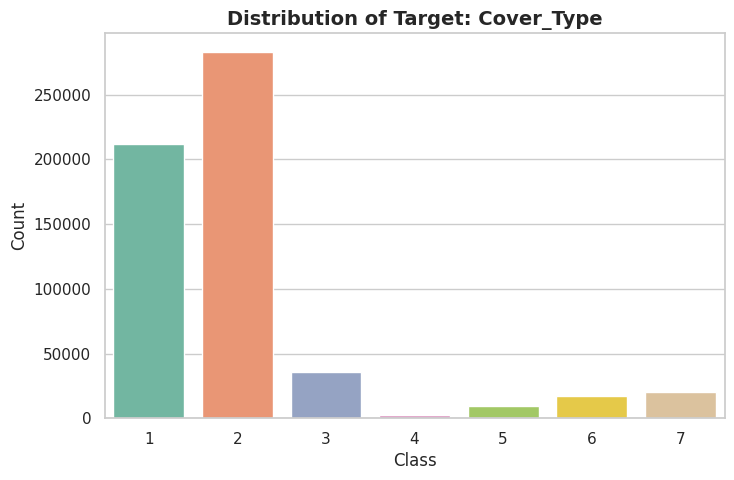

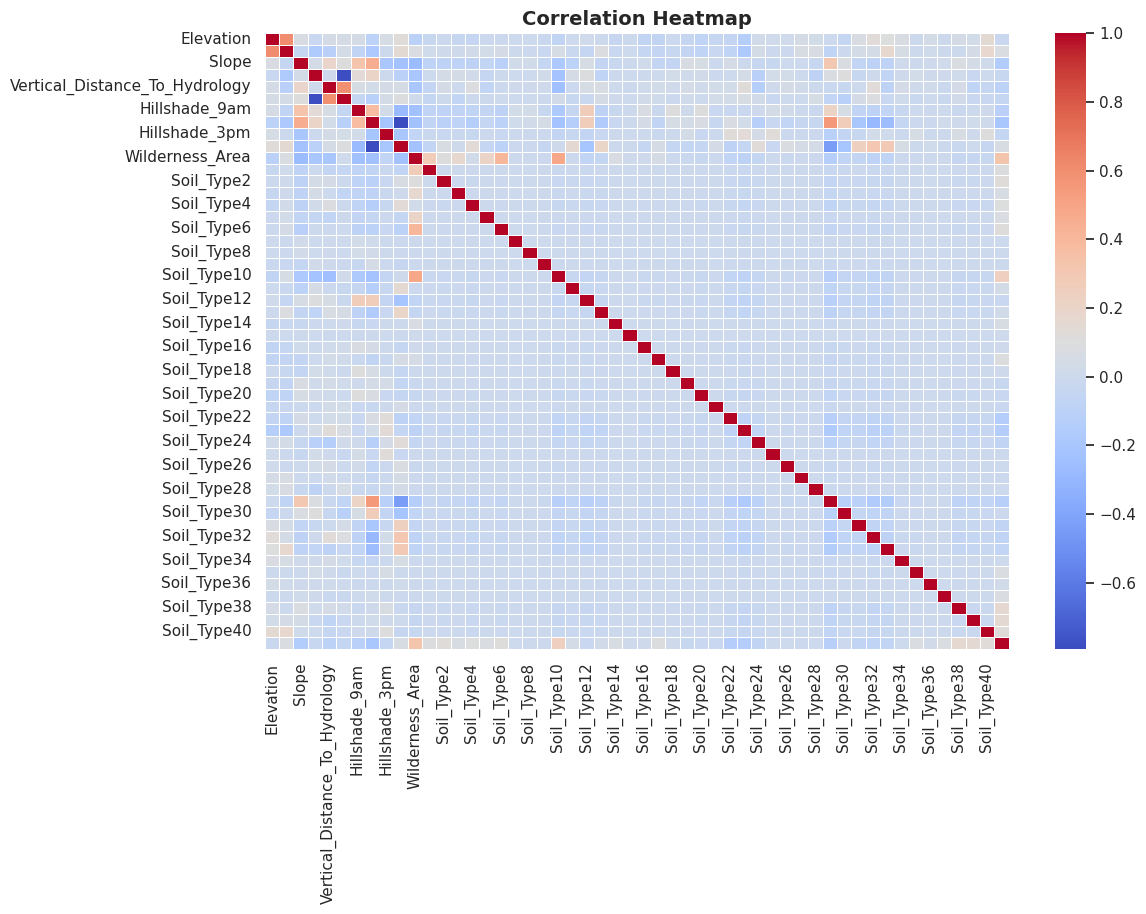

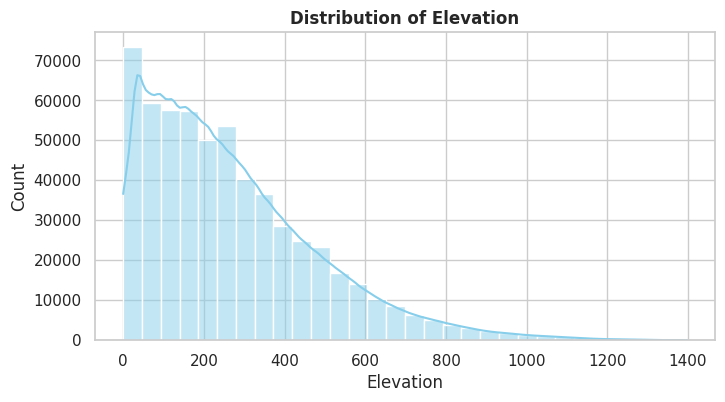

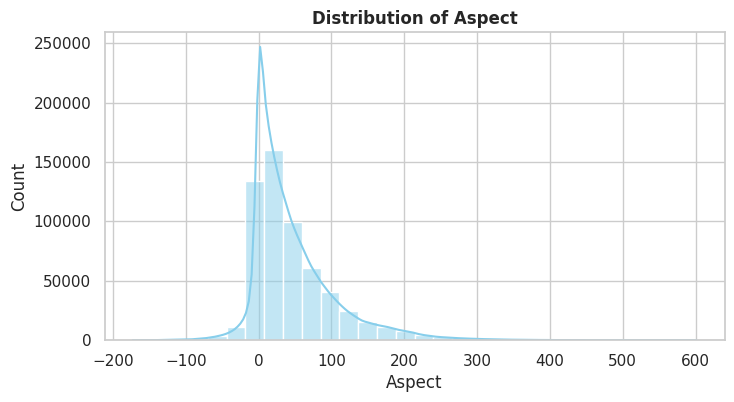

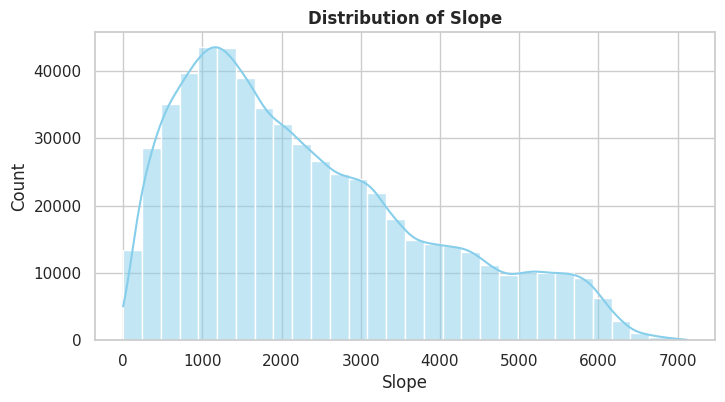

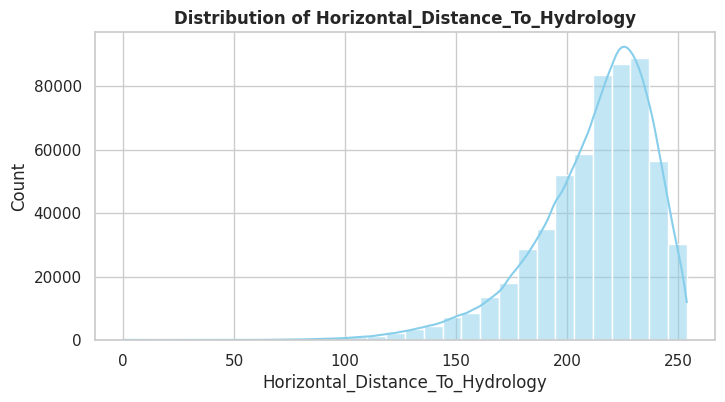

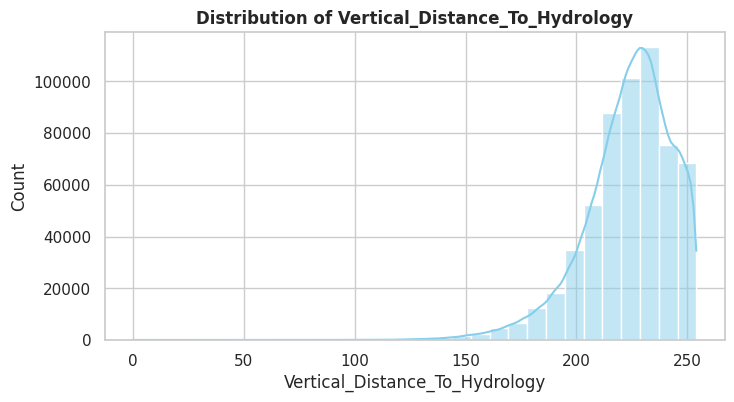

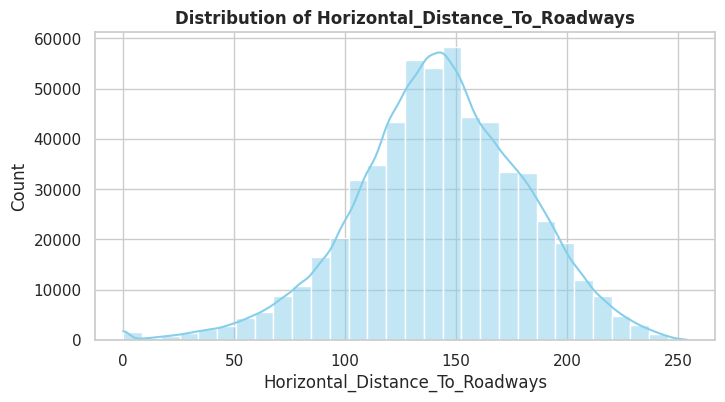

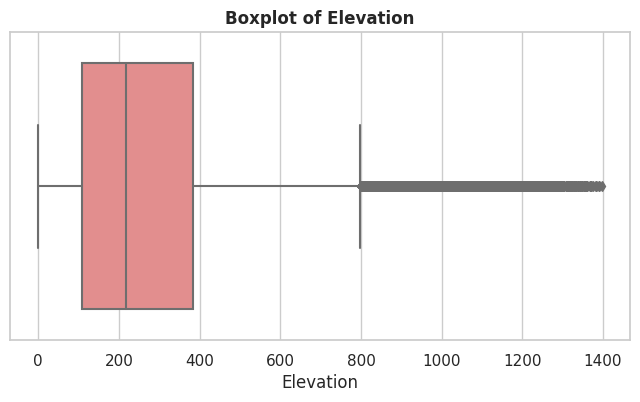

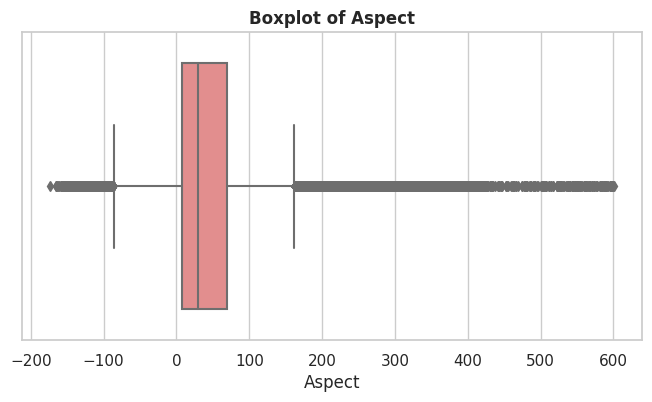

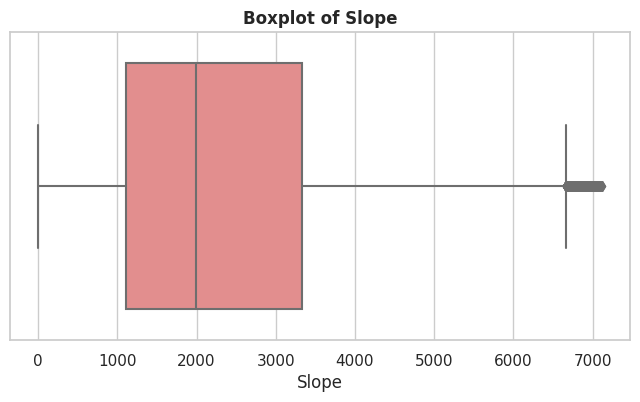

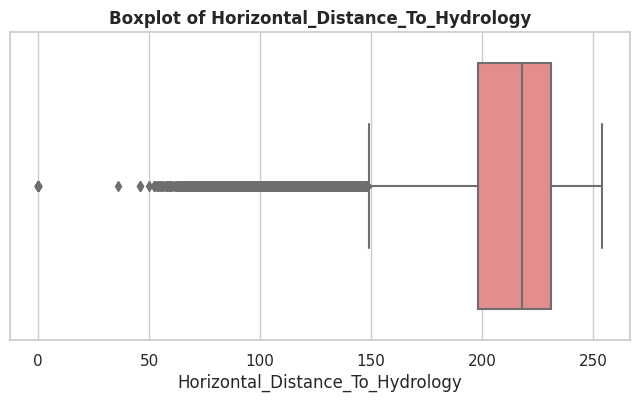

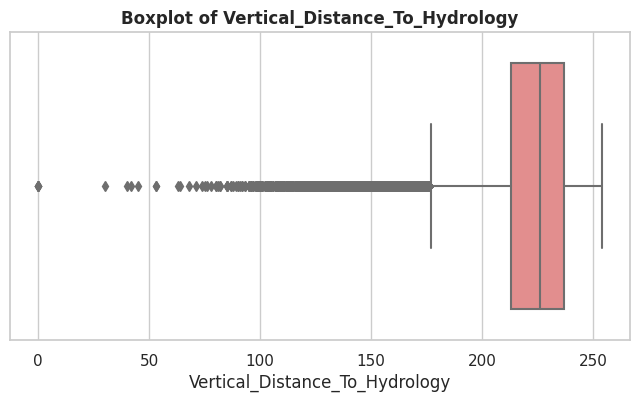

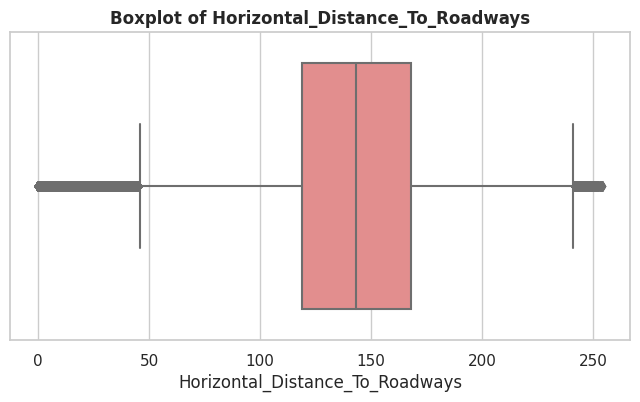

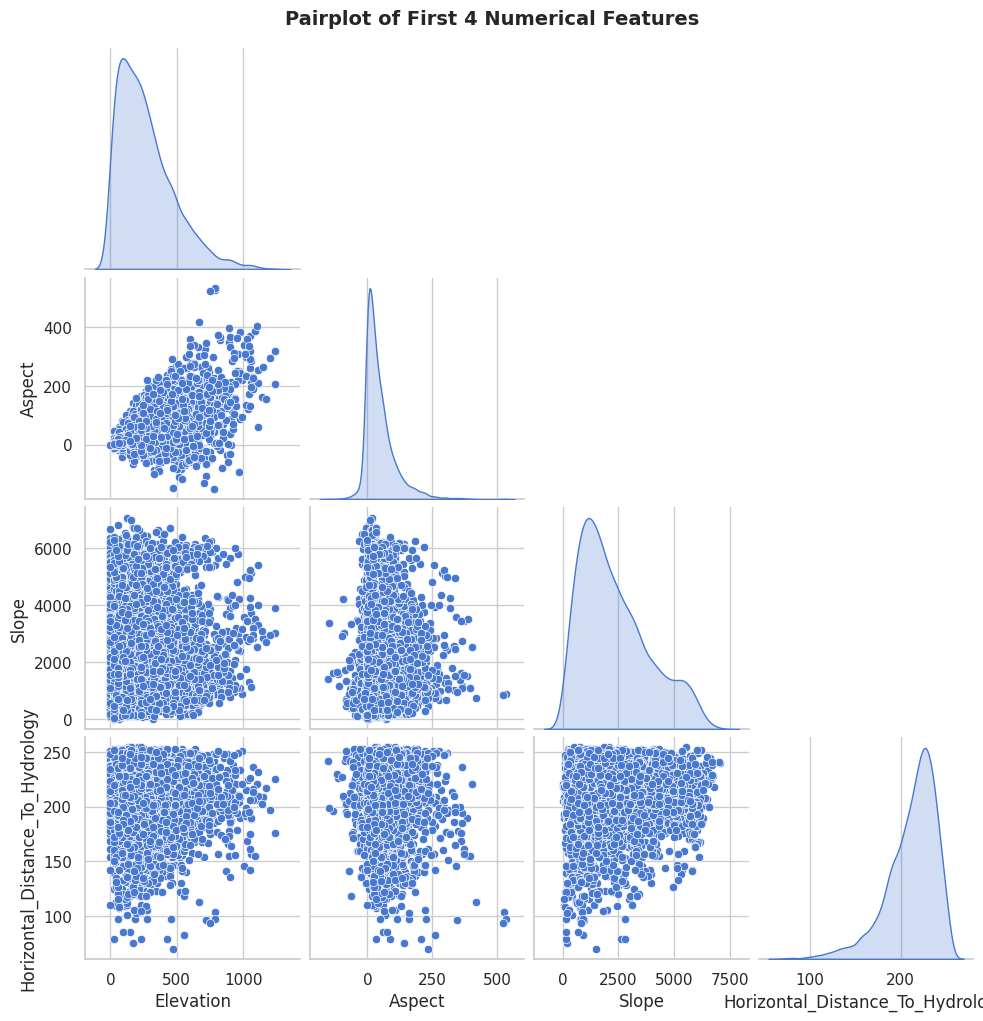

✅ Visualization Completed


In [6]:
# Run visualization on dataset
visualize_dataset(df, target_col="Cover_Type")


## 🔎 What This Does

# Outlier handling: Caps outliers using the IQR rule.

# Preprocessing:
 
# Numeric → StandardScaler

# Categorical → OneHotEncoder

# Models trained: Logistic Regression, RandomForest, XGBoost

# Metrics shown: Accuracy 

# Visualization:

# Accuracy barplot


In [9]:
def train_classifiers(df, target_col, test_size=0.2, random_state=42):
    """
    Train classifiers with preprocessing, handle outliers, encode categories,
    and evaluate models (Logistic, RandomForest, XGBoost).
    Shows accuracy .
    """
    # -----------------
    # Handle Target Encoding (Shift labels if not starting at 0)
    # -----------------
    y = df[target_col].copy()
    if y.min() != 0:  
        print(f"⚠️ Shifting target labels from {y.unique()} to start at 0...")
        y = y - y.min()  

    X = df.drop(columns=[target_col])
    
    # Encode categorical columns
    for col in X.select_dtypes(include=["object", "category"]).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=random_state),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=random_state)
    }
    
    scores = {}
    plt.figure(figsize=(10, 7))
    
    for name, model in models.items():
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("classifier", model)
        ])
        pipe.fit(X_train, y_train)
        
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        # ROC-AUC (only if binary classification)
        if len(np.unique(y)) == 2:
            y_prob = pipe.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
            scores[name] = {"Accuracy": acc, "ROC-AUC": auc}
        else:
            scores[name] = {"Accuracy": acc}
    
    
    return models, pd.DataFrame(scores).T


In [10]:
# Train models and get scores
models, scores = train_classifiers(df, target_col="Cover_Type")

print(scores)


⚠️ Shifting target labels from [5 2 1 7 3 6 4] to start at 0...
                     Accuracy
Logistic Regression  0.641266
Random Forest        0.938470
XGBoost              0.791073


<Figure size 1000x700 with 0 Axes>